k-means聚类的一个主要应用之一就是矢量量化。   
简单来说，矢量量化就是四舍五入的N维版本。在处理数字等一维数据时，会用四舍五入技术减少存储空间。
同理，当把四舍五入这个概念推广到N维数据时，就变成了矢量量化。     
矢量量化广泛应用于图片压缩，我们用比原图像更少的比特数来存储每个像素，从而实现图像图片。   


The size of the image will be reduced by a factor of 4.0

Compression rate =  75.0 %


d:\python36\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


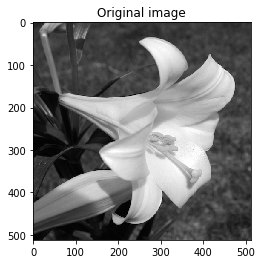

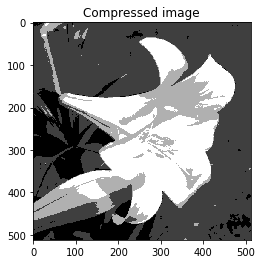

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import misc

def compress_image(img,num_clusters):
    # 将输入 的图片转换成（样本量，特征量）数组，以运行k-means聚类算法
    X = img.reshape((-1,1))
    
    # 对输入数据运行k-means聚类
    kmeans = KMeans(n_clusters=num_clusters,n_init=4,random_state=5)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_.squeeze() # 从数组的形状中删除单维条目，即把shape中为1的维度去掉
    labels = kmeans.labels_
    
    # 为每个数据配置离它最近的中心点，并转变为图片的形状
    input_image_compressed = np.choose(labels,centroids).reshape(img.shape) # 按照序号label对centroids中的数进行选择
    
    return input_image_compressed


# 定义画图函数观察压缩算法对图片质量的影响
def plot_image(img,title):
    vmin = img.min()
    vmax = img.max()
    plt.figure()
    plt.title(title)
    plt.imshow(img,cmap=plt.cm.gray,vmin=vmin,vmax=vmax)
    
    
input_file = 'flower_image.jpg'
num_bits = 2

num_clusters = np.power(2,num_bits)

# 打印压缩率
compression_rate = round(100*(8.0-num_bits)/8,2)
print('\nThe size of the image will be reduced by a factor of',8/num_bits)
print('\nCompression rate = ',compression_rate,'%')

# 加载输入图片
input_image = misc.imread(input_file,True).astype(np.uint8)
# 显示原始图片
plot_image(input_image,'Original image')

# 压缩图片
input_image_compressed = compress_image(input_image,num_clusters)
plot_image(input_image_compressed,'Compressed image')
plt.show()